Задание 8. Проверка гипотез

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по темам раздела 4. 

Шаг 2. Составьте и проверьте гипотезы о данных по предложенному датасету (Алгоритм выполнения представлен в практическом занятии по теме 4.4).

Шаг 3. Проверьте нормальности распределения (Алгоритм выполнения представлен в практическом занятии по теме 4.4).

Шаг 4. Выполните анализ корреляции признаков  (Алгоритм выполнения представлен в практическом занятии по теме 4.4).

Шаг 5. Опубликуйте файл расширения ipynb на платформе Odin.

# Описание данных
Каждый клиент описывается следующим набором признаков:
- `Возраст`, `Среднемесячный расход`, `Средняя продолжительность разговоров`, `Звонков днем за месяц`, `Звонков вечером за месяц`, `Звонков ночью за месяц`, `Звонки в другие города`, `Звонки в другие страны`, `Доля звонков на стационарные телефоны`, `Количество SMS за месяц`, `Дата подключения тарифа`, `Социальная категория`.

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Сформулировать и проверить следующие гипотезы
- клиенты чаще звонят днем или вечером по количеству звонков;
- клиенты чаще звонят днем или (вечером + ночью) по количеству звонков;
- студенты звонят чаще аспирантов ко количеству звонков;
- клиенты больше звонили в 2019 году по сравнению с 2021 годом по количеству звонков;
- студенты больше совершили звонков в 2019 году по сравнению с 2021 годом.

In [1]:
#подключение библиотек 
import pandas as pd
import numpy as np

In [2]:
#тесты для проверки гипотез о законе распределения
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import anderson
from scipy.stats import jarque_bera

#тесты для проверки гипотезы о равенстве параметров распределений
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

#работа с датой
import datetime as dt 

#работа с графикой 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#чтение исходных данных
df = pd.read_excel('/content/hw_8.xlsx')
df.head(2)

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35,студент
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54,рабочий


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   int64  
 6   Звонки в другие города                 4492 non-null   int64  
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   int64  
 9   Количество SMS за месяц                4492 non-null   int64  
 10  Дата подключения тарифа                4492 non-null   object 
 11  Соци

In [5]:
#преобразование строкового признака в дату
df = df.astype({'Дата подключения тарифа' : 'datetime64'})

In [6]:
#добавление нового признака -- год
df['year'] = df['Дата подключения тарифа'].dt.year

In [7]:
#удаление пропущенных значений
df.dropna(inplace = True)

In [8]:
# просмотр уникальных значений категориальных признаков 
for col in df.select_dtypes('object'):
    print(df[col].unique())

['рабочий' 'аспирант' 'пенсионер' 'студент']


Шаг 2. Сформулировать и проверить следующие гипотезы

клиенты чаще звонят днем или вечером по количеству звонков;
клиенты чаще звонят днем или (вечером + ночью) по количеству звонков;
студенты звонят чаще аспирантов ко количеству звонков;
клиенты больше звонили в 2019 году по сравнению с 2021 годом по количеству звонков;
студенты больше совершили звонков в 2019 году по сравнению с 2021 годом.
Последовательность проверки:

Важно понять с какими данными мы работаем: выделяем исследуемые выборки;
Рассчитать точечные оценки (выборочное среднее, медиана, мода) и нарисовать графики плотности (если возможно);
Проверяем гипотезу о нормальности каждой из выборок.
Если обе выборки имеют нормальное распределение, то для проверки гипотезы о значимости их параметров необходимо применять критерий Стьюдента. В противном случае, т.е. хотя бы одна выборке не подчиняется нормальному закону, используем критерий Манна-Уитни.

In [9]:
#визуальный анализ исследуемых выборок 
df[['Звонков днем за месяц', 'Звонков вечером за месяц']]

,Звонков днем за месяц,Звонков вечером за месяц
1,111.0,109.0
2,41.0,27.0
3,47.0,49.0
4,58.0,77.0
5,45.0,75.0
...,...,...
4487,36.0,28.0
4488,46.0,66.0
4489,58.0,129.0
4490,50.0,74.0


In [10]:
# точечные оценки -- выборочное среднее, медиана
df[['Звонков днем за месяц', 'Звонков вечером за месяц']].agg(['mean', 'median'])

,Звонков днем за месяц,Звонков вечером за месяц
mean,63.907223,70.293905
median,53.000000,71.000000


In [11]:
df

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория,year
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54,рабочий,2021
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15,рабочий,2015
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20,рабочий,2016
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53,аспирант,2017
5,26,324.56,3.3,45.0,75.0,3,1,1,8,15,2016-11-13 15:53:16,аспирант,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36.0,28.0,2,6,0,12,30,2021-04-10 14:58:23,рабочий,2021
4488,40,500.68,6.0,46.0,66.0,0,6,0,15,23,2021-09-22 14:52:43,рабочий,2021
4489,60,470.42,3.5,58.0,129.0,2,4,0,19,5,2019-04-04 17:33:38,пенсионер,2019
4490,38,858.99,9.3,50.0,74.0,0,0,0,28,69,2015-12-30 16:28:26,рабочий,2015


Полученные точечные оценки по количеству звонков вечером больше оценок по количеству звонков днем (70.293905 > 63.907223; 71.000000 > 53.000000).

В связи с этим формулировать альтернативную гипотезу нужно в пользу преимущества (чаще) количества вечерних звонков, потому в исходной формулировке написано или.

In [12]:
#мода
df[['Звонков днем за месяц', 'Звонков вечером за месяц']].mode()

,Звонков днем за месяц,Звонков вечером за месяц
0,53.0,3.0


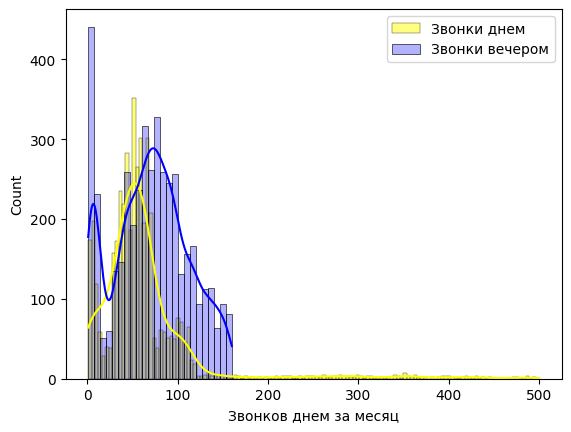

In [13]:
#графики плотностей 
sns.histplot(x = df['Звонков днем за месяц'], 
             color = 'yellow',
             label = 'Звонки днем', 
             kde = True)
sns.histplot(x = df['Звонков вечером за месяц'], 
             color = 'blue',
             label = 'Звонки вечером',
             alpha = 0.3,
             kde = True)
plt.legend()

Видим, что в выборках имеются аномалии: у звонков днем тяжелый правый хвост; у обеих выборок следует удалить данные слева. 

Видим, что график гистограммы и плотности по звонкам вечером находится "немного правее" аналогичных графиков по звонкам днем -- о чем сигнализировали нам точечные оценки, полученные выше.

Проверим гипотезы о нормальности закона распределения каждой из имеющихся выборок. Для этого воспользуемся критериями Шапиро и Колмогорова-Смирнова:

.shapiro() -- критерий Шапиро (согласно для n>5000 значение pvalue может быть неточным);
.kstest() -- критерий Колмогорова-Смирнова.
Проверямые гипотезы:

Н0 -- выборка по показателю Звонков днем за месяц распределена нормально
Н1 -- выборка по показателю Звонков днем за месяц имеет распределение, отличное от нормального.
Аналогичную пару гипотез формулируем для признака Звонков вечером за месяц.

In [14]:
#проверка на нормальность с помощью критерия Шапиро

#проверяемые признаки
columns = ['Звонков днем за месяц', 'Звонков вечером за месяц']

#организуем проверку в цикле 
for col in columns:
    print('-'*10, col)
    print(shapiro(df[col]))

---------- Звонков днем за месяц
ShapiroResult(statistic=0.6097855567932129, pvalue=0.0)
---------- Звонков вечером за месяц
ShapiroResult(statistic=0.9722208976745605, pvalue=1.6634125725695095e-28)


Напомним, что  pvalue=1.6634125725695095e−28=1.6634125725695095×10−28=1.6634125725695095×11028≈0 .

В обоих случаях имеем, что  pvalue<0.05 . Следовательно, гипотезу  H0  о нормальности исследуемых выборок отвергаем на уровне значимости  α=0.05 . Иными словами, законы распределения выборок отличны от нормального закона.

In [15]:
#проверка на нормальность с помощью критерия Колмогорова-Смирнова

for col in columns:
    print('-'*10, col)
    print(kstest(df[col], 'norm', args=(df[col].mean(), df[col].std())))

---------- Звонков днем за месяц
KstestResult(statistic=0.24841148482932585, pvalue=2.678340502735771e-241, statistic_location=71.0, statistic_sign=1)
---------- Звонков вечером за месяц
KstestResult(statistic=0.06669961597732588, pvalue=1.4032270686453868e-17, statistic_location=13.0, statistic_sign=1)


Аналогичный результат получен по критерию КС.

Теперь для того, чтобы проверить исходную гипотезу о "клиенты чаще звонят днем или вечером по количеству звонков" необходимо проверить гипотезы о значениях параметров для распределений выборок.

Посколько показано, что выборки не имеют нормального распределения (или хотя бы одна из выборок), то для проверки гипотез о параметрах воспользуемся критерием Манна-Уитни -- .mannwhitneyu().

Если бы обе выборки подчинялись нормальному закону, то для проверки гипотез о параметрах применялся бы критерий Стьюдента -- .ttest_ind().

Формулировка гипотез:

H0 : отсутствует статически значимая разница между количество звонков, совершаемых клиентами днем и количеством звонков, совершаемых клиентами вечером.

H1 : количество звонков, совершаемых клиентами днем, *МЕНЬШЕ количества звонков, совершаемых клиентами вечером .

ВОПРОС: Почему в формулировке H1 оказано слово меньше? ОТВЕТ: В формулировку гипотезы H1 указывать слова меньше/больше нужно исключительно согласно соотношения точечных оценок параметров (выборочных средних или медиан). Здесь имеем, что в среднем звонков совершалось больше вечером. Поэтому гипотеза H1 сформулирована именно так.

Эти гипотезы проверяются относительно параметров распределений -- выборочного среднего или медианы.

In [16]:
# используем тест Манна-Уитни, т.е. не все распределения выборок подчиняются нормальному закону 
# если бы подчинялись все, то использовали бы статистику Стьюдента 
mannwhitneyu(df['Звонков днем за месяц'], 
             df['Звонков вечером за месяц'],  
             alternative = 'less')

# Здесь мы указываем параметр `less` для левосторонней области,
# т.е. согласно справке количество звонков днем стохастически меньше 
# количества звонков вечером 

# Вот здесь и возникла на занятии у нас путаница. 
# В справке написано немного другое про этот параметр, 
# а если там же немного ниже посмотреть пример про постановку диагноза 
# мужчинам и женщинам, то, видимо, авторы справки где-то ошиблись 
# или при написании $F(u) > G(U)$ имели что-то другое.

MannwhitneyuResult(statistic=7617513.0, pvalue=1.377833668305823e-74)

Имеем, что  pvalue=1.377833668305823e−74≈0<0.05 , следовательно, гипотезу  H0  отвергаемым. Иными словами, клиенты чаще (больше) звонят вечером, чем днем.

Проверяем гипотезу, что  клиенты чаще звонят днем или (вечером + ночью) по количеству звонков 

**Гипотеза: клиенты чаще звонят днем или (вечером + ночью) по количеству звонков**

Найдем количество звонков (вечером + ночью);
Получим точечные оцекни выборочных средних двух выборок;
Построим графики плотностей;
Проверим гипотезы о нормальности распределений;
Проверим гипотезы о равенстве параметров распределений.
Гипотеза: клиенты больше звонили в 2019 году по сравнению с 2021 годом по количеству звонков



In [17]:
#визуальный анализ исследуемых выборок 
df['Суммарно звонков'] = df['Звонков вечером за месяц'] + df['Звонков ночью за месяц']

In [18]:
df

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория,year,Суммарно звонков
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54,рабочий,2021,110.0
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15,рабочий,2015,27.0
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20,рабочий,2016,49.0
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53,аспирант,2017,81.0
5,26,324.56,3.3,45.0,75.0,3,1,1,8,15,2016-11-13 15:53:16,аспирант,2016,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36.0,28.0,2,6,0,12,30,2021-04-10 14:58:23,рабочий,2021,30.0
4488,40,500.68,6.0,46.0,66.0,0,6,0,15,23,2021-09-22 14:52:43,рабочий,2021,66.0
4489,60,470.42,3.5,58.0,129.0,2,4,0,19,5,2019-04-04 17:33:38,пенсионер,2019,131.0
4490,38,858.99,9.3,50.0,74.0,0,0,0,28,69,2015-12-30 16:28:26,рабочий,2015,74.0


In [19]:
#визуальный анализ исследуемых выборок 
df[['Звонков днем за месяц', 'Суммарно звонков']]

,Звонков днем за месяц,Суммарно звонков
1,111.0,110.0
2,41.0,27.0
3,47.0,49.0
4,58.0,81.0
5,45.0,78.0
...,...,...
4487,36.0,30.0
4488,46.0,66.0
4489,58.0,131.0
4490,50.0,74.0


In [20]:
# точечные оценки -- выборочное среднее, медиана
df[['Звонков днем за месяц', 'Суммарно звонков']].agg(['mean', 'median'])

,Звонков днем за месяц,Суммарно звонков
mean,63.907223,76.555305
median,53.000000,75.000000


необходимо заметить, что полученные точечные оценки по количеству звонков (вечером+ночью) больше оценок по количеству звонков днем (76.555305 > 63.907223; 75.000000 > 53.000000).

В связи с этим формулировать альтернативную гипотезу нужно в пользу преимущества (чаще) количества вечерних+ночных звонков, потому в исходной формулировке написано или.

In [21]:
#мода
df[['Звонков днем за месяц', 'Суммарно звонков']].mode()

,Звонков днем за месяц,Суммарно звонков
0,53.0,3.0


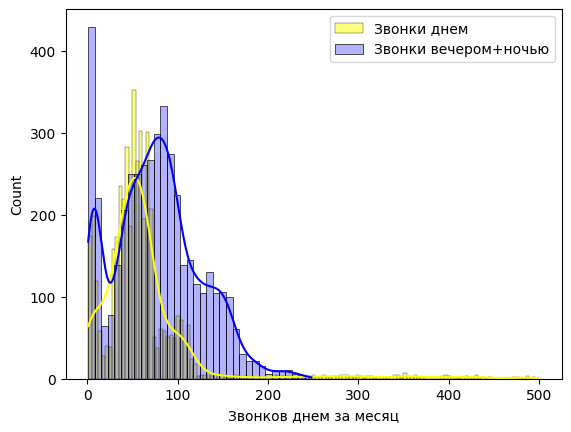

In [22]:
#графики плотностей 
sns.histplot(x = df['Звонков днем за месяц'], 
             color = 'yellow',
             label = 'Звонки днем', 
             kde = True)
sns.histplot(x = df['Суммарно звонков'], 
             color = 'blue',
             label = 'Звонки вечером+ночью',
             alpha = 0.3,
             kde = True)
plt.legend()

Видим, что в выборках имеются аномалии: у звонков днем тяжелый правый хвост; у обеих выборок следует удалить данные слева. В общем случае аномальные наблюдения необходимо удалять ДО ПРОВЕРКИ ГИПОТЕЗ. Однако сейчас сосредоточимся на технике и последовательности проверки и обрабатывать аномалии не будем. Позже вернемся к этому вопросу.

Видим, что график гистограммы и плотности по звонкам вечером находится "немного правее" аналогичных графиков по звонкам днем -- о чем сигнализировали нам точечные оценки, полученные выше.

Проверим гипотезы о нормальности закона распределения каждой из имеющихся выборок. Для этого воспользуемся критериями Шапиро и Колмогорова-Смирнова:

.shapiro() -- критерий Шапиро (согласно для n>5000 значение pvalue может быть неточным);
.kstest() -- критерий Колмогорова-Смирнова.


Проверямые гипотезы:

Н0  -- выборка по показателю Звонков днем за месяц распределена нормально
Н1  -- выборка по показателю Звонков днем за месяц имеет распределение, отличное от нормального.
Аналогичную пару гипотез формулируем для признака Суммарное время (Звонков вечером+ночью) за месяц.

In [23]:
def test_normal_distribution(dataframe, col1, col2):
    
    #проверка на нормальность с помощью критерия Шапиро
    
    #задаем уровень значимости
    alpha = 0.05 

    p_value_shapiro = list()
    p_value_ks = list()

    #проверяемые признаки
    columns = [col1, col2]
    col = ''
    #организуем проверку в цикле 
    for col in columns:
        print(f'Проверка на нормальное распределение признака <<{col}>> по критерию Шапиро \n')
        statistica, p_value = shapiro(dataframe[col].dropna())
        p_value_shapiro.append(p_value)
        if p_value <= alpha:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> отвергаем, 
т.е. признак <<{col}>> имеет распределение, отличное от нормального.  
            """)
        else:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> принимаем,
т.е. признак <<{col}>> имеет нормальное распределение.  
            """)

    for col in columns:
        print(f'Проверка на нормальное распределение признака <<{col}>> по критерию Колмогорова-Смирнова \n')
        statistica, p_value = kstest(dataframe[col].dropna(), 'norm', args=(dataframe[col].mean(), dataframe[col].std()))
        p_value_ks.append(p_value)
        if p_value <= alpha:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> отвергаем, 
т.е. признак <<{col}>> имеет распределение, отличное от нормального.  
            """)
        else:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> принимаем,
т.е. признак <<{col}>> имеет нормальное распределение.  
            """)
    
    pd.options.display.float_format = '{:,.2f}'.format
    return pd.concat([pd.Series(p_value_shapiro, 
                                columns, 
                                name = 'p_value по критерию Шапиро'), 
                      pd.Series(p_value_ks, 
                                columns, 
                                name = 'p_value по критерию Колмогорова-Смирнова')
                      ], 
                     axis = 1
                     )

In [24]:
test_normal_distribution(df, 'Звонков днем за месяц', 'Суммарно звонков')

Проверка на нормальное распределение признака <<Звонков днем за месяц>> по критерию Шапиро 

Гипотезу H_0 о нормальном законе распределения признака <<Звонков днем за месяц>> отвергаем, 
т.е. признак <<Звонков днем за месяц>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Суммарно звонков>> по критерию Шапиро 

Гипотезу H_0 о нормальном законе распределения признака <<Суммарно звонков>> отвергаем, 
т.е. признак <<Суммарно звонков>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Звонков днем за месяц>> по критерию Колмогорова-Смирнова 

Гипотезу H_0 о нормальном законе распределения признака <<Звонков днем за месяц>> отвергаем, 
т.е. признак <<Звонков днем за месяц>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Суммарно звонков>> по критерию Колмогорова-Смирнова 

Гипотезу H_0 о нормальном законе распр

,p_value по критерию Шапиро,p_value по критерию Колмогорова-Смирнова
Звонков днем за месяц,0.00,0.00
Суммарно звонков,0.00,0.00


Делаем вывод о том, что исследуемые выборки имеют законы распределения, отличные от нормального.

Проверим гипотезы о параметрах

Так как законы распределения отличны от нормального, то для проверки гипотезы воспользуемся критерием Манна-Уитни.

Формулировка гипотез:

H0  : отсутствует статически значимая разница между количество звонков, совершаемых клиентами днем и количеством звонков, совершаемых клиентами вечером и вечером.

H1  : количество звонков, совершаемых клиентами днем, *МЕНЬШЕ количества звонков, совершаемых клиентами вечером и днем.

ВОПРОС: Почему в формулировке  H1  оказано слово меньше? ОТВЕТ: В формулировку гипотезы  H1  указывать слова меньше/больше нужно исключительно согласно соотношения точечных оценок параметров (выборочных средних или медиан). Здесь имеем, что в среднем звонков совершалось больше вечером. Поэтому гипотеза  H1  сформулирована именно так.

Эти гипотезы проверяются относительно параметров распределений -- выборочного среднего или медианы.

Важно помнить, что формулировка альтернативной гипотезы ( H1 ) отпределяет вид области:

Гипотезы	Область
H0:x=y,H1:x≠y 
двусторонняя критическая область
H0:x=y,H1:x<y 
левосторонняя критическая область
H0:x=y,H1:x>y 
правосторонняя критическая область


In [25]:
mannwhitneyu(df['Звонков днем за месяц'], 
             df['Суммарно звонков'],  
             alternative = 'less')

# Здесь мы указываем параметр `less` для левосторонней области,
# т.е. согласно справке количество звонков днем стохастически меньше 
# количества звонков вечером и вечером 

MannwhitneyuResult(statistic=7216206.5, pvalue=1.79206243693732e-103)

Имеем, что  pvalue=1.79206243693732e−103≈0<0.05 , следовательно, гипотезу  H0  отвергаемым. Иными словами, клиенты чаще (больше) звонят вечером и ночью, чем днем.

**2 способ**

In [26]:
#формируем датасет
series_2019 = pd.Series(
    data = df[df['year'] == 2019]['Суммарно звонков'],
    name = 'Звонки_2019')

series_2021 = pd.Series(
    data = df[df['year'] == 2021]['Суммарно звонков'],
    name = 'Звонки_2021')

#формируем единый датасет, чтобы воспользоваться функциями  
df_2019_2021 = (
    pd.concat([series_2019.reset_index(),
               series_2021.reset_index()],
              axis = 1).drop(columns=['index'])
          )

In [27]:
df.head(2)

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория,year,Суммарно звонков
1,51,287.51,1.70,111.00,109.00,1,44,0,6,1,2021-10-21 15:39:54,рабочий,2021,110.00
2,41,113.70,2.10,41.00,27.00,0,0,0,1,36,2015-03-26 11:26:15,рабочий,2015,27.00


In [28]:
# находим общее количество звонков за месяц, совершаемых вечером и ночью 
df['Суммарно звонков'] = df['Звонков ночью за месяц'] + df['Звонков вечером за месяц']

In [29]:
#составим вспомогательную функцию для расчета выборочных средних и медиан
#отображения плотностей 
def st_plot(dataframe, col1, col2):
    
    #график плотности 
    ax = sns.histplot(x = dataframe[col1], 
             color = 'yellow',
             label = col1, 
             kde = True)
    #расчет среднего и медина, распаковка значений 
    mean_col1, median_col1 = dataframe[col1].agg(['mean', 'median'])
    #графики среднего и медианы
    ax.axvline(mean_col1,
               label = f'Выборочное среднее {np.round(mean_col1, 1)}',
               color = 'yellow'
        )
    ax.axvline(median_col1,
               label = f'Медиана {np.round(median_col1, 1)}',
               color = 'yellow'
        )
    
    mean_col2, median_col2 = dataframe[col2].agg(['mean', 'median'])
    ax.axvline(mean_col2,
               label = f'Выборочное среднее {np.round(mean_col2, 1)}',
               color = 'blue'
        )
    ax.axvline(median_col2,
               label = f'Медиана {np.round(median_col2, 1)}',
               color = 'blue'
        )
    sns.histplot(x = dataframe[col2], 
             color = 'blue',
             label = col2,
             alpha = 0.3,
             kde = True)
    plt.legend()
    plt.xlabel('')
    plt.ylabel('')

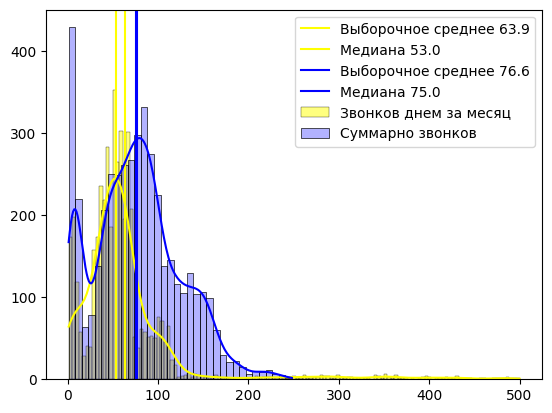

In [30]:
st_plot(df, 'Звонков днем за месяц', 'Суммарно звонков')

Видим, что есть отличия по количеству звонков днем против количества звонков вечером+ночью.

Проверяем гипотезы на номральность распределения по критериям Шапиро и Колмогорова-Смирнова.

Составим гипотезы:

H0: исследуемые выборочные совокупности имеют нормальное распределение.

H1: исследуемые выборочные совокупности имеют распределение, отличное от нормального закона.

In [31]:
def test_normal_distribution(dataframe, col1, col2):
    
    #проверка на нормальность с помощью критерия Шапиро
    
    #задаем уровень значимости
    alpha = 0.05 

    p_value_shapiro = list()
    p_value_ks = list()

    #проверяемые признаки
    columns = [col1, col2]
    col = ''
    #организуем проверку в цикле 
    for col in columns:
        print(f'Проверка на нормальное распределение признака <<{col}>> по критерию Шапиро \n')
        statistica, p_value = shapiro(dataframe[col].dropna())
        p_value_shapiro.append(p_value)
        if p_value <= alpha:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> отвергаем, 
т.е. признак <<{col}>> имеет распределение, отличное от нормального.  
            """)
        else:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> принимаем,
т.е. признак <<{col}>> имеет нормальное распределение.  
            """)

    for col in columns:
        print(f'Проверка на нормальное распределение признака <<{col}>> по критерию Колмогорова-Смирнова \n')
        statistica, p_value = kstest(dataframe[col].dropna(), 'norm', args=(dataframe[col].mean(), dataframe[col].std()))
        p_value_ks.append(p_value)
        if p_value <= alpha:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> отвергаем, 
т.е. признак <<{col}>> имеет распределение, отличное от нормального.  
            """)
        else:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> принимаем,
т.е. признак <<{col}>> имеет нормальное распределение.  
            """)
    
    pd.options.display.float_format = '{:,.2f}'.format
    return pd.concat([pd.Series(p_value_shapiro, 
                                columns, 
                                name = 'p_value по критерию Шапиро'), 
                      pd.Series(p_value_ks, 
                                columns, 
                                name = 'p_value по критерию Колмогорова-Смирнова')
                      ], 
                     axis = 1
                     )

In [32]:
test_normal_distribution(df, 'Звонков днем за месяц', 'Суммарно звонков')

Проверка на нормальное распределение признака <<Звонков днем за месяц>> по критерию Шапиро 

Гипотезу H_0 о нормальном законе распределения признака <<Звонков днем за месяц>> отвергаем, 
т.е. признак <<Звонков днем за месяц>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Суммарно звонков>> по критерию Шапиро 

Гипотезу H_0 о нормальном законе распределения признака <<Суммарно звонков>> отвергаем, 
т.е. признак <<Суммарно звонков>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Звонков днем за месяц>> по критерию Колмогорова-Смирнова 

Гипотезу H_0 о нормальном законе распределения признака <<Звонков днем за месяц>> отвергаем, 
т.е. признак <<Звонков днем за месяц>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Суммарно звонков>> по критерию Колмогорова-Смирнова 

Гипотезу H_0 о нормальном законе распр

,p_value по критерию Шапиро,p_value по критерию Колмогорова-Смирнова
Звонков днем за месяц,0.00,0.00
Суммарно звонков,0.00,0.00


In [33]:
#проверка на нормальность с помощью критерия Шапиро

#проверяемые признаки
columns = ['Звонков днем за месяц', 'Суммарно звонков']

#организуем проверку в цикле 
for col in columns:
    print('-'*10, col)
    print(shapiro(df[col]))

---------- Звонков днем за месяц
ShapiroResult(statistic=0.6097855567932129, pvalue=0.0)
---------- Суммарно звонков
ShapiroResult(statistic=0.9719788432121277, pvalue=1.2928023826230495e-28)


Делаем вывод о том, что исследуемые выборки имеют законы распределения, отличные от нормального.

Проверим гипотезы о параметрах

Так как законы распределения отличны от нормального, то для проверки гипотезы воспользуемся критерием Манна-Уитни.

Формулировка гипотез:

H0 : отсутствует статически значимая разница между количество звонков, совершаемых клиентами днем и количеством звонков, совершаемых клиентами вечером и вечером.

H1 : количество звонков, совершаемых клиентами днем, *МЕНЬШЕ количества звонков, совершаемых клиентами вечером и днем.

ВОПРОС: Почему в формулировке H1 оказано слово меньше? ОТВЕТ: В формулировку гипотезы H1 указывать слова меньше/больше нужно исключительно согласно соотношения точечных оценок параметров (выборочных средних или медиан). Здесь имеем, что в среднем звонков совершалось больше вечером. Поэтому гипотеза H1 сформулирована именно так.

Эти гипотезы проверяются относительно параметров распределений -- выборочного среднего или медианы.

Важно помнить, что формулировка альтернативной гипотезы (H1) отпределяет вид области:

Гипотезы	Область
H0:x=y,H1:x≠y
двусторонняя критическая область
H0:x=y,H1:x<y
левосторонняя критическая область
H0:x=y,H1:x>y
правосторонняя критическая область

In [34]:
mannwhitneyu(df['Звонков днем за месяц'], 
             df['Суммарно звонков'],  
             alternative = 'less')

# Здесь мы указываем параметр `less` для левосторонней области,
# т.е. согласно справке количество звонков днем стохастически меньше 
# количества звонков вечером и вечером 

MannwhitneyuResult(statistic=7216206.5, pvalue=1.79206243693732e-103)

Имеем, что pvalue=1.79206243693732e−103≈0<0.05, следовательно, гипотезу H0 отвергаемым. Иными словами, клиенты чаще (больше) звонят вечером и ночью, чем днем.

В обоих случаях имеем, что  pvalue<0.05 . Следовательно, гипотезу  H0  о нормальности исследуемых выборок отвергаем на уровне значимости  α=0.05 . Иными словами, законы распределения выборок отличны от нормального закона.

In [35]:
#проверка на нормальность с помощью критерия Колмогорова-Смирнова

for col in columns:
    print('-'*10, col)
    print(kstest(df[col], 'norm', args=(df[col].mean(), df[col].std())))

---------- Звонков днем за месяц
KstestResult(statistic=0.24841148482932585, pvalue=2.678340502735771e-241, statistic_location=71.0, statistic_sign=1)
---------- Суммарно звонков
KstestResult(statistic=0.05597052354314929, pvalue=1.6705295146534765e-12, statistic_location=1.0, statistic_sign=-1)


Аналогичный резульатат получен по критерию КС.

Теперь для того, чтобы проверить исходную гипотезу о "клиенты чаще звонят днем или вечером по количеству звонков" необходимо проверить гипотезы о значениях параметров для распределений выборок.

Посколько показано, что выборки не имеют нормального распределения (или хотя бы одна из выборок), то для проверки гипотез о параметрах воспользуемся критерием Манна-Уитни -- .mannwhitneyu().

Если бы обе выборки подчинялись нормальному закону, то для проверки гипотез о параметрах применялся бы критерий Стьюдента -- .ttest_ind().

Формулировка гипотез:

H0 : отсутствует статически значимая разница между количество звонков, совершаемых клиентами днем и количеством звонков, совершаемых клиентами вечером.

H1 : количество звонков, совершаемых клиентами днем, *МЕНЬШЕ количества звонков, совершаемых клиентами вечером .

ВОПРОС: Почему в формулировке H1 оказано слово меньше? ОТВЕТ: В формулировку гипотезы H1 указывать слова меньше/больше нужно исключительно согласно соотношения точечных оценок параметров (выборочных средних или медиан). Здесь имеем, что в среднем звонков совершалось больше вечером. Поэтому гипотеза H1 сформулирована именно так.

Эти гипотезы проверяются относительно параметров распределений -- выборочного среднего или медианы.

In [36]:
# используем тест Манна-Уитни, т.е. не все распределения выборок подчиняются нормальному закону 
# если бы подчинялись все, то использовали бы статистику Стьюдента 
mannwhitneyu(df['Звонков днем за месяц'], 
             df['Суммарно звонков'],  
             alternative = 'less')

# Здесь мы указываем параметр `less` для левосторонней области,
# т.е. согласно справке количество звонков днем стохастически меньше 
# количества звонков вечером 



MannwhitneyuResult(statistic=7216206.5, pvalue=1.79206243693732e-103)

Имеем, что  pvalue=1.79206243693732e-103≈0<0.05 , следовательно, гипотезу  H0  отвергаемым. Иными словами, клиенты чаще (больше) звонят вечером+ночью, чем днем.

Проверяем следующую гипотезу, что студенты звонят чаще аспирантов по количеству звонков.

**Гипотеза: студенты звонят чаще аспирантов ко количеству звонков**
> Формируем выборки по категориям;

> Получим точечные оценки выборочных средних двух выборок;

> Построим графики плотностей;

> Проверим гипотезы о нормальности распределений;

> Проверим гипотезы о равенстве параметров распределений.






**1 способ**

In [37]:
# по каждому считаем количество звонков 
df['Общее количество звонков'] = df['Звонков днем за месяц'] + df['Звонков вечером за месяц'] + df['Звонков ночью за месяц']
df.head(2)

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория,year,Суммарно звонков,Общее количество звонков
1,51,287.51,1.70,111.00,109.00,1,44,0,6,1,2021-10-21 15:39:54,рабочий,2021,110.00,221.00
2,41,113.70,2.10,41.00,27.00,0,0,0,1,36,2015-03-26 11:26:15,рабочий,2015,27.00,68.00


In [38]:
series_aspirant = pd.Series(
    data = df[df['Социальная категория'] == 'аспирант']['Общее количество звонков'],
    name = 'Звонки_аспирантов')

series_student = pd.Series(
    data = df[df['Социальная категория'] == 'студент']['Общее количество звонков'],
    name = 'Звонки_студентов')

#формируем единый датасет, чтобы воспользоваться функциями  
df_student_aspirant = (
    pd.concat([series_student.reset_index(),
           series_aspirant.reset_index()], 
          axis = 1).drop(columns=['index'])
          )

In [39]:
df_student_aspirant.head(2)

,Звонки_студентов,Звонки_аспирантов
0,309.00,139.00
1,49.00,123.00


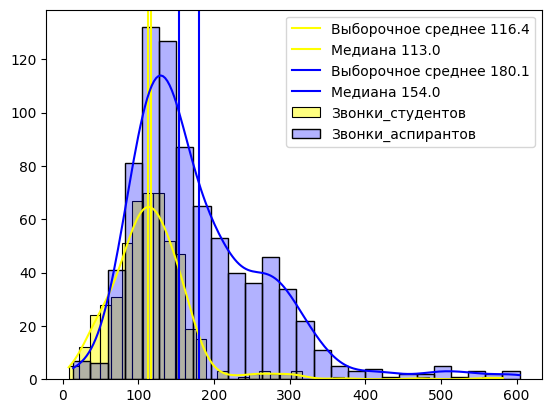

In [40]:
# графики и точеные оценки
st_plot(df_student_aspirant, 'Звонки_студентов', 'Звонки_аспирантов')

In [41]:
test_normal_distribution(df_student_aspirant, 'Звонки_студентов', 'Звонки_аспирантов')

Проверка на нормальное распределение признака <<Звонки_студентов>> по критерию Шапиро 

Гипотезу H_0 о нормальном законе распределения признака <<Звонки_студентов>> отвергаем, 
т.е. признак <<Звонки_студентов>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Звонки_аспирантов>> по критерию Шапиро 

Гипотезу H_0 о нормальном законе распределения признака <<Звонки_аспирантов>> отвергаем, 
т.е. признак <<Звонки_аспирантов>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Звонки_студентов>> по критерию Колмогорова-Смирнова 

Гипотезу H_0 о нормальном законе распределения признака <<Звонки_студентов>> отвергаем, 
т.е. признак <<Звонки_студентов>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Звонки_аспирантов>> по критерию Колмогорова-Смирнова 

Гипотезу H_0 о нормальном законе распределения признака <<Звонки

,p_value по критерию Шапиро,p_value по критерию Колмогорова-Смирнова
Звонки_студентов,0.00,0.00
Звонки_аспирантов,0.00,0.00


Проверим гипотезы о параметрах

Так как законы распределения отличны от нормального, то для проверки гипотезы воспользуемся критерием Манна-Уитни.

Формулировка гипотез:

H0  : отсутствует статически значимая разница между количество звонков, совершаемых студентами и количеством звонков, совершаемых аспирантами.

H1  : количество звонков, совершаемых студентами, *МЕНЬШЕ количества звонков, совершаемых аспирантами.

Обращаем внимание, что гипотеза  H1  сформулирована так потому, что выборочное среднее по студентами меньше выборочного среднего по аспирантам.

In [42]:
mannwhitneyu(df_student_aspirant['Звонки_студентов'], 
             df_student_aspirant['Звонки_аспирантов'],
             nan_policy = 'omit',  #пропуски опускаем
             alternative = 'less')

MannwhitneyuResult(statistic=109390.5, pvalue=6.018105395383329e-49)

Итог: аспиранты звонят больше. Исходное предположение оказалось ошибочным.

2 способ

In [43]:
df

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория,year,Суммарно звонков,Общее количество звонков
1,51,287.51,1.70,111.00,109.00,1,44,0,6,1,2021-10-21 15:39:54,рабочий,2021,110.00,221.00
2,41,113.70,2.10,41.00,27.00,0,0,0,1,36,2015-03-26 11:26:15,рабочий,2015,27.00,68.00
3,35,410.23,5.60,47.00,49.00,0,0,0,11,23,2016-01-04 15:53:20,рабочий,2016,49.00,96.00
4,26,537.60,4.80,58.00,77.00,4,0,0,16,29,2017-05-03 13:33:53,аспирант,2017,81.00,139.00
5,26,324.56,3.30,45.00,75.00,3,1,1,8,15,2016-11-13 15:53:16,аспирант,2016,78.00,123.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.70,36.00,28.00,2,6,0,12,30,2021-04-10 14:58:23,рабочий,2021,30.00,66.00
4488,40,500.68,6.00,46.00,66.00,0,6,0,15,23,2021-09-22 14:52:43,рабочий,2021,66.00,112.00
4489,60,470.42,3.50,58.00,129.00,2,4,0,19,5,2019-04-04 17:33:38,пенсионер,2019,131.00,189.00
4490,38,858.99,9.30,50.00,74.00,0,0,0,28,69,2015-12-30 16:28:26,рабочий,2015,74.00,124.00


In [44]:
#визуальный анализ исследуемых выборок 
df['Общее количество звонков'] = df['Звонков вечером за месяц'] + df['Звонков днем за месяц']+df['Звонков ночью за месяц']

In [45]:
#считаем количество студентов и аспирантов.
df['Социальная категория'].value_counts()

рабочий      2449
аспирант      819
пенсионер     651
студент       511
Name: Социальная категория, dtype: int64

In [46]:
stat = ['студент']
df1=df.loc[df['Социальная категория'].isin(stat)]

In [47]:
df1


,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория,year,Суммарно звонков,Общее количество звонков
10,23,"2,672.34",13.80,222.00,77.00,10,30,0,20,10,2019-09-01 13:58:28,студент,2019,87.00,309.00
13,21,57.33,2.00,2.00,39.00,8,0,0,2,21,2017-12-14 14:13:53,студент,2017,47.00,49.00
31,19,52.43,0.70,29.00,74.00,8,0,0,0,39,2018-07-20 10:59:46,студент,2018,82.00,111.00
59,20,32.87,0.40,23.00,101.00,10,3,0,3,46,2021-07-19 16:04:10,студент,2021,111.00,134.00
125,21,141.01,1.70,36.00,79.00,7,2,0,0,54,2020-08-29 14:31:29,студент,2020,86.00,122.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,19,149.15,2.10,44.00,63.00,9,0,0,0,22,2019-02-12 10:54:40,студент,2019,72.00,116.00
4463,19,82.94,1.20,32.00,74.00,5,2,0,14,25,2018-03-23 10:37:57,студент,2018,79.00,111.00
4464,24,"2,086.56",5.40,399.00,148.00,10,7,7,18,0,2018-06-21 11:36:56,студент,2018,158.00,557.00
4467,21,259.90,3.00,48.00,76.00,24,0,0,5,49,2016-10-22 13:42:56,студент,2016,100.00,148.00


In [48]:
#визуальный анализ исследуемых выборок 
df1[['Звонков днем за месяц', 'Звонков вечером за месяц','Звонков ночью за месяц','Общее количество звонков' ]]


,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Общее количество звонков
10,222.00,77.00,10,309.00
13,2.00,39.00,8,49.00
31,29.00,74.00,8,111.00
59,23.00,101.00,10,134.00
125,36.00,79.00,7,122.00
...,...,...,...,...
4455,44.00,63.00,9,116.00
4463,32.00,74.00,5,111.00
4464,399.00,148.00,10,557.00
4467,48.00,76.00,24,148.00


In [49]:
# точечные оценки -- выборочное среднее, медиана
df1[['Звонков днем за месяц', 'Звонков вечером за месяц','Звонков ночью за месяц','Общее количество звонков']].agg(['sum','mean', 'median'])

,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Общее количество звонков
sum,"19,361.00","35,049.00","5,087.00","59,497.00"
mean,37.89,68.59,9.95,116.43
median,35.00,70.00,7.00,113.00


In [50]:
# коэффициент корреляции между ранговой и интервальной переменными
stat1 = ['аспирант']
df2=df.loc[df['Социальная категория'].isin(stat1)]

In [51]:
df2

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория,year,Суммарно звонков,Общее количество звонков
4,26,537.60,4.80,58.00,77.00,4,0,0,16,29,2017-05-03 13:33:53,аспирант,2017,81.00,139.00
5,26,324.56,3.30,45.00,75.00,3,1,1,8,15,2016-11-13 15:53:16,аспирант,2016,78.00,123.00
11,29,556.92,3.40,97.00,96.00,2,0,0,0,49,2015-11-05 13:27:44,аспирант,2015,98.00,195.00
21,27,245.95,2.70,62.00,55.00,0,0,0,19,23,2021-11-21 14:04:51,аспирант,2021,55.00,117.00
22,30,318.82,3.50,50.00,72.00,0,2,0,12,26,2020-08-15 11:42:09,аспирант,2020,72.00,122.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,29,806.06,7.40,66.00,77.00,2,0,0,2,14,2019-04-11 15:01:15,аспирант,2019,79.00,145.00
4461,28,651.01,4.00,85.00,134.00,3,3,1,17,39,2019-02-27 15:32:47,аспирант,2019,137.00,222.00
4473,28,405.13,4.00,43.00,97.00,2,19,2,4,13,2016-10-02 11:51:15,аспирант,2016,99.00,142.00
4483,26,135.04,2.00,55.00,27.00,2,23,0,20,1,2021-09-09 12:01:23,аспирант,2021,29.00,84.00


In [52]:
df2[['Звонков днем за месяц', 'Звонков вечером за месяц','Звонков ночью за месяц','Общее количество звонков']].agg(['sum','mean', 'median'])

,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Общее количество звонков
sum,"65,926.00","69,883.00","11,706.00","147,515.00"
mean,80.50,85.33,14.29,180.12
median,63.00,85.00,3.00,154.00


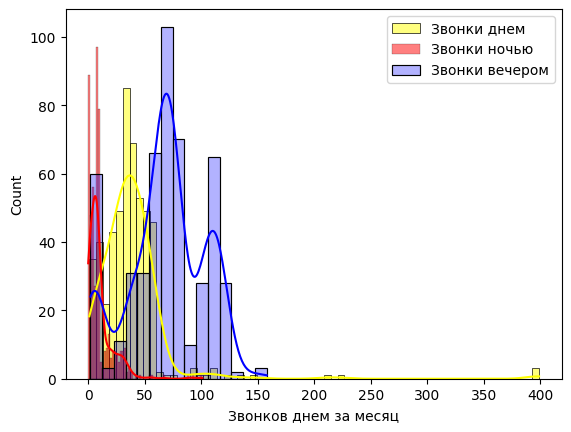

In [53]:
#графики плотностей 
sns.histplot(x = df1['Звонков днем за месяц'], 
             color = 'yellow',
             label = 'Звонки днем', 
             kde = True)
sns.histplot(x = df1['Звонков ночью за месяц'], 
             color = 'red',
             label = 'Звонки ночью', 
             kde = True)
sns.histplot(x = df1['Звонков вечером за месяц'], 
             color = 'blue',
             label = 'Звонки вечером',
             alpha = 0.3,
             kde = True)
plt.legend()

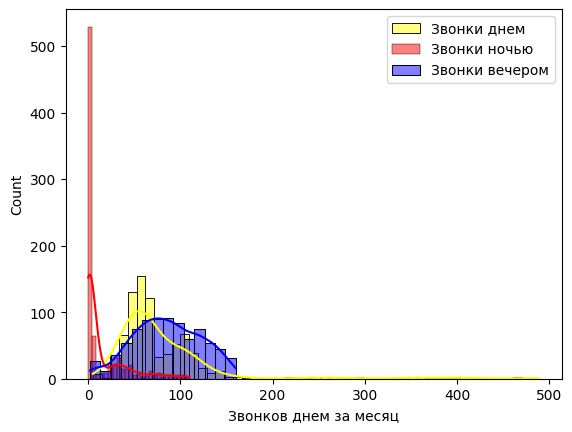

In [54]:
#графики плотностей 
sns.histplot(x = df2['Звонков днем за месяц'], 
             color = 'yellow',
             label = 'Звонки днем', 
             kde = True)
sns.histplot(x = df2['Звонков ночью за месяц'], 
             color = 'red',
             label = 'Звонки ночью', 
             kde = True)
sns.histplot(x = df2['Звонков вечером за месяц'], 
             color = 'blue',
             label = 'Звонки вечером',
             kde = True)
plt.legend()

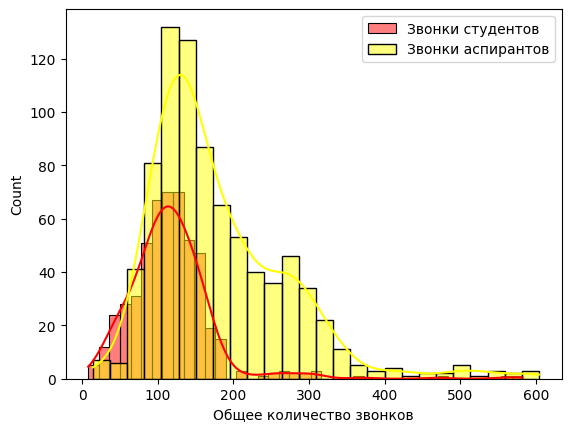

In [55]:
#графики плотностей 
sns.histplot(x = df1['Общее количество звонков'], 
             color = 'red',
             label = 'Звонки студентов', 
             kde = True)
sns.histplot(x = df2['Общее количество звонков'], 
             color = 'yellow',
             label = 'Звонки аспирантов',
             kde = True)
plt.legend()

Видим, что график гистограммы и плотности по звонкам вечером находится "немного правее" аналогичных графиков по звонкам днем -- о чем сигнализировали нам точечные оценки, полученные выше.

Проверим гипотезы о нормальности закона распределения каждой из имеющихся выборок. Для этого воспользуемся критериями Шапиро и Колмогорова-Смирнова:

.shapiro() -- критерий Шапиро (согласно для n>5000 значение pvalue может быть неточным); .kstest() -- критерий Колмогорова-Смирнова.

Проверямые гипотезы:

Н0 -- выборка по показателю Звонков днем за месяц распределена нормально Н1 -- выборка по показателю Звонков днем за месяц имеет распределение, отличное от нормального. Аналогичную пару гипотез формулируем для признака Суммарное время (Звонков вечером+ночью) за месяц.

In [56]:
#проверка на нормальность с помощью критерия Шапиро

#проверяемые признаки
columns = ['Звонков днем за месяц', 'Звонков вечером за месяц', 'Звонков ночью за месяц']

#организуем проверку в цикле 
for col in columns:
    print('-'*10, col)
    print(shapiro(df[col]))

---------- Звонков днем за месяц
ShapiroResult(statistic=0.6097855567932129, pvalue=0.0)
---------- Звонков вечером за месяц
ShapiroResult(statistic=0.9722208976745605, pvalue=1.6634125725695095e-28)
---------- Звонков ночью за месяц
ShapiroResult(statistic=0.46643000841140747, pvalue=0.0)


Напомним, что pvalue=1.6634125725695095e−28=1.6634125725695095×10−28=1.6634125725695095×11028≈0.

В обоих случаях имеем, что pvalue<0.05. Следовательно, гипотезу H0 о нормальности исследуемых выборок отвергаем на уровне значимости α=0.05. Иными словами, законы распределения выборок отличны от нормального закона.

In [57]:
#проверка на нормальность с помощью критерия Колмогорова-Смирнова

for col in columns:
    print('-'*10, col)
    print(kstest(df[col], 'norm', args=(df[col].mean(), df[col].std())))

---------- Звонков днем за месяц
KstestResult(statistic=0.24841148482932585, pvalue=2.678340502735771e-241, statistic_location=71.0, statistic_sign=1)
---------- Звонков вечером за месяц
KstestResult(statistic=0.06669961597732588, pvalue=1.4032270686453868e-17, statistic_location=13.0, statistic_sign=1)
---------- Звонков ночью за месяц
KstestResult(statistic=0.3348008874207698, pvalue=0.0, statistic_location=0, statistic_sign=-1)


In [58]:
# используем тест Манна-Уитни, т.е. не все распределения выборок подчиняются нормальному закону 
# если бы подчинялись все, то использовали бы статистику Стьюдента 
mannwhitneyu(df1['Звонков днем за месяц'], 
             df1['Звонков вечером за месяц'],
             alternative = 'less')

# Здесь мы указываем параметр `less` для левосторонней области,
# т.е. согласно справке количество звонков днем стохастически меньше 
# количества звонков вечером 


MannwhitneyuResult(statistic=49640.5, pvalue=3.032288989054456e-66)

In [59]:
# используем тест Манна-Уитни, т.е. не все распределения выборок подчиняются нормальному закону 
# если бы подчинялись все, то использовали бы статистику Стьюдента 
mannwhitneyu(df2['Звонков днем за месяц'], 
             df2['Звонков вечером за месяц'], 
             alternative = 'less')

# Здесь мы указываем параметр `less` для левосторонней области,
# т.е. согласно справке количество звонков днем стохастически меньше 
# количества звонков вечером 


MannwhitneyuResult(statistic=257369.5, pvalue=1.8093579971393035e-16)

Теперь для того, чтобы проверить исходную гипотезу о "клиенты чаще звонят днем или вечером по количеству звонков" необходимо проверить гипотезы о значениях параметров для распределений выборок.

Посколько показано, что выборки не имеют нормального распределения (или хотя бы одна из выборок), то для проверки гипотез о параметрах воспользуемся критерием Манна-Уитни -- .mannwhitneyu().

Если бы обе выборки подчинялись нормальному закону, то для проверки гипотез о параметрах применялся бы критерий Стьюдента -- .ttest_ind().

Формулировка гипотез:

H0  : отсутствует статически значимая разница между количество звонков, совершаемых клиентами днем и количеством звонков, совершаемых клиентами вечером.

H1  : количество звонков, совершаемых клиентами днем, *МЕНЬШЕ количества звонков, совершаемых клиентами вечером .

ВОПРОС: Почему в формулировке  H1  оказано слово меньше? ОТВЕТ: В формулировку гипотезы  H1  указывать слова меньше/больше нужно исключительно согласно соотношения точечных оценок параметров (выборочных средних или медиан). Здесь имеем, что в среднем звонков совершалось больше вечером. Поэтому гипотеза  H1  сформулирована именно так.

Эти гипотезы проверяются относительно параметров распределений -- выборочного среднего или медианы.

Итог: аспиранты звонят больше. Исходное предположение оказалось ошибочным.

3 способ

In [60]:
df3=df[df['Социальная категория']=='студент']

In [61]:
df3

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория,year,Суммарно звонков,Общее количество звонков
10,23,"2,672.34",13.80,222.00,77.00,10,30,0,20,10,2019-09-01 13:58:28,студент,2019,87.00,309.00
13,21,57.33,2.00,2.00,39.00,8,0,0,2,21,2017-12-14 14:13:53,студент,2017,47.00,49.00
31,19,52.43,0.70,29.00,74.00,8,0,0,0,39,2018-07-20 10:59:46,студент,2018,82.00,111.00
59,20,32.87,0.40,23.00,101.00,10,3,0,3,46,2021-07-19 16:04:10,студент,2021,111.00,134.00
125,21,141.01,1.70,36.00,79.00,7,2,0,0,54,2020-08-29 14:31:29,студент,2020,86.00,122.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,19,149.15,2.10,44.00,63.00,9,0,0,0,22,2019-02-12 10:54:40,студент,2019,72.00,116.00
4463,19,82.94,1.20,32.00,74.00,5,2,0,14,25,2018-03-23 10:37:57,студент,2018,79.00,111.00
4464,24,"2,086.56",5.40,399.00,148.00,10,7,7,18,0,2018-06-21 11:36:56,студент,2018,158.00,557.00
4467,21,259.90,3.00,48.00,76.00,24,0,0,5,49,2016-10-22 13:42:56,студент,2016,100.00,148.00


In [62]:
# точечные оценки -- выборочное среднее, медиана
df3[['Звонков днем за месяц', 'Звонков вечером за месяц','Звонков ночью за месяц','Общее количество звонков']].agg(['sum','mean', 'median'])

,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Общее количество звонков
sum,"19,361.00","35,049.00","5,087.00","59,497.00"
mean,37.89,68.59,9.95,116.43
median,35.00,70.00,7.00,113.00


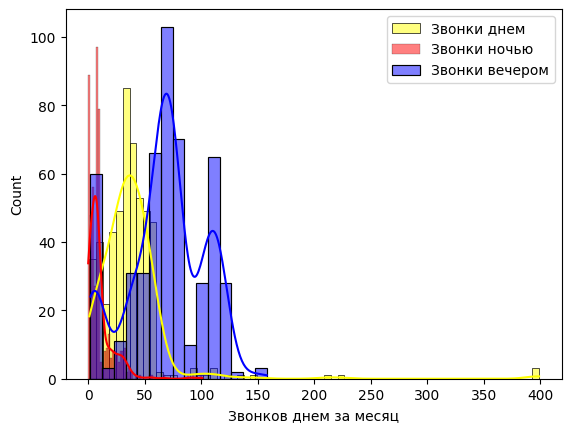

In [63]:
#графики плотностей 
sns.histplot(x = df3['Звонков днем за месяц'], 
             color = 'yellow',
             label = 'Звонки днем', 
             kde = True)
sns.histplot(x = df3['Звонков ночью за месяц'], 
             color = 'red',
             label = 'Звонки ночью', 
             kde = True)
sns.histplot(x = df3['Звонков вечером за месяц'], 
             color = 'blue',
             label = 'Звонки вечером',
             kde = True)
plt.legend()

In [64]:
df4=df[df['Социальная категория']=='аспирант']

In [65]:
df4

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория,year,Суммарно звонков,Общее количество звонков
4,26,537.60,4.80,58.00,77.00,4,0,0,16,29,2017-05-03 13:33:53,аспирант,2017,81.00,139.00
5,26,324.56,3.30,45.00,75.00,3,1,1,8,15,2016-11-13 15:53:16,аспирант,2016,78.00,123.00
11,29,556.92,3.40,97.00,96.00,2,0,0,0,49,2015-11-05 13:27:44,аспирант,2015,98.00,195.00
21,27,245.95,2.70,62.00,55.00,0,0,0,19,23,2021-11-21 14:04:51,аспирант,2021,55.00,117.00
22,30,318.82,3.50,50.00,72.00,0,2,0,12,26,2020-08-15 11:42:09,аспирант,2020,72.00,122.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,29,806.06,7.40,66.00,77.00,2,0,0,2,14,2019-04-11 15:01:15,аспирант,2019,79.00,145.00
4461,28,651.01,4.00,85.00,134.00,3,3,1,17,39,2019-02-27 15:32:47,аспирант,2019,137.00,222.00
4473,28,405.13,4.00,43.00,97.00,2,19,2,4,13,2016-10-02 11:51:15,аспирант,2016,99.00,142.00
4483,26,135.04,2.00,55.00,27.00,2,23,0,20,1,2021-09-09 12:01:23,аспирант,2021,29.00,84.00


In [66]:
# точечные оценки -- выборочное среднее, медиана
df4[['Звонков днем за месяц', 'Звонков вечером за месяц','Звонков ночью за месяц','Общее количество звонков']].agg(['sum','mean', 'median'])

,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Общее количество звонков
sum,"65,926.00","69,883.00","11,706.00","147,515.00"
mean,80.50,85.33,14.29,180.12
median,63.00,85.00,3.00,154.00


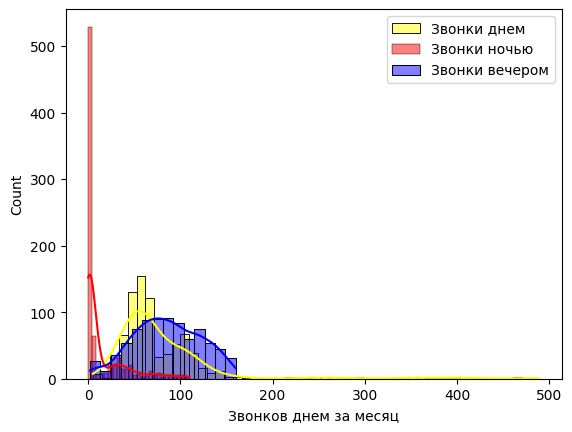

In [67]:
#графики плотностей 
sns.histplot(x = df4['Звонков днем за месяц'], 
             color = 'yellow',
             label = 'Звонки днем', 
             kde = True)
sns.histplot(x = df4['Звонков ночью за месяц'], 
             color = 'red',
             label = 'Звонки ночью', 
             kde = True)
sns.histplot(x = df4['Звонков вечером за месяц'], 
             color = 'blue',
             label = 'Звонки вечером',
             kde = True)
plt.legend()

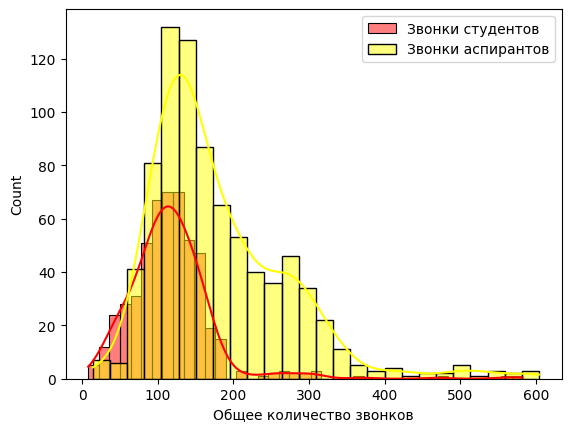

In [68]:
#графики плотностей 
sns.histplot(x = df3['Общее количество звонков'], 
             color = 'red',
             label = 'Звонки студентов', 
             kde = True)
sns.histplot(x = df4['Общее количество звонков'], 
             color = 'yellow',
             label = 'Звонки аспирантов',
             kde = True)
plt.legend()

Видим, что график гистограммы и плотности по звонкам вечером находится "немного правее" аналогичных графиков по звонкам днем -- о чем сигнализировали нам точечные оценки, полученные выше.

Проверим гипотезы о нормальности закона распределения каждой из имеющихся выборок. Для этого воспользуемся критериями Шапиро и Колмогорова-Смирнова:

.shapiro() -- критерий Шапиро (согласно для n>5000 значение pvalue может быть неточным); .kstest() -- критерий Колмогорова-Смирнова.

Проверямые гипотезы:

Н0 -- выборка по показателю Звонков днем за месяц распределена нормально Н1 -- выборка по показателю Звонков днем за месяц имеет распределение, отличное от нормального. Аналогичную пару гипотез формулируем для признака Суммарное время (Звонков вечером+ночью) за месяц.

In [69]:
#проверка на нормальность с помощью критерия Шапиро

#проверяемые признаки
columns = ['Звонков днем за месяц', 'Звонков вечером за месяц', 'Звонков ночью за месяц']

#организуем проверку в цикле 
for col in columns:
    print('-'*10, col)
    print(shapiro(df3[col]))

---------- Звонков днем за месяц
ShapiroResult(statistic=0.5153085589408875, pvalue=4.287180573961245e-35)
---------- Звонков вечером за месяц
ShapiroResult(statistic=0.9547247886657715, pvalue=2.0567294395368307e-11)
---------- Звонков ночью за месяц
ShapiroResult(statistic=0.7044901847839355, pvalue=5.373376443055092e-29)


In [70]:
#проверка на нормальность с помощью критерия Шапиро

#проверяемые признаки
columns = ['Звонков днем за месяц', 'Звонков вечером за месяц', 'Звонков ночью за месяц']

#организуем проверку в цикле 
for col in columns:
    print('-'*10, col)
    print(shapiro(df4[col]))

---------- Звонков днем за месяц
ShapiroResult(statistic=0.601473331451416, pvalue=1.1416827004362869e-39)
---------- Звонков вечером за месяц
ShapiroResult(statistic=0.9871295094490051, pvalue=1.3225125030658091e-06)
---------- Звонков ночью за месяц
ShapiroResult(statistic=0.6441420912742615, pvalue=4.321430142448774e-38)


Напомним, что  pvalue=1.6634125725695095e−28=1.6634125725695095×10−28=1.6634125725695095×11028≈0 .

В обоих случаях имеем, что  pvalue<0.05 . Следовательно, гипотезу  H0  о нормальности исследуемых выборок отвергаем на уровне значимости  α=0.05 . Иными словами, законы распределения выборок отличны от нормального закона.

In [71]:
#проверка на нормальность с помощью критерия Колмогорова-Смирнова

for col in columns:
    print('-'*10, col)
    print(kstest(df3[col], 'norm', args=(df3[col].mean(), df3[col].std())))

---------- Звонков днем за месяц
KstestResult(statistic=0.22908872871888997, pvalue=4.6835793234908716e-24, statistic_location=60.0, statistic_sign=1)
---------- Звонков вечером за месяц
KstestResult(statistic=0.0990241855397263, pvalue=8.172536860710161e-05, statistic_location=61.0, statistic_sign=-1)
---------- Звонков ночью за месяц
KstestResult(statistic=0.27343023231482744, pvalue=2.9963787851032703e-34, statistic_location=10, statistic_sign=1)


In [72]:
#проверка на нормальность с помощью критерия Колмогорова-Смирнова

for col in columns:
    print('-'*10, col)
    print(kstest(df4[col], 'norm', args=(df4[col].mean(), df4[col].std())))

---------- Звонков днем за месяц
KstestResult(statistic=0.19852988129858534, pvalue=9.152709750568122e-29, statistic_location=30.0, statistic_sign=-1)
---------- Звонков вечером за месяц
KstestResult(statistic=0.04104905195175024, pvalue=0.12309296717356588, statistic_location=114.0, statistic_sign=-1)
---------- Звонков ночью за месяц
KstestResult(statistic=0.33292238617680037, pvalue=2.0449066391282344e-81, statistic_location=6, statistic_sign=1)


In [73]:
# используем тест Манна-Уитни, т.е. не все распределения выборок подчиняются нормальному закону 
# если бы подчинялись все, то использовали бы статистику Стьюдента 
mannwhitneyu(df3['Звонков днем за месяц'], 
             df3['Звонков вечером за месяц'], 
             alternative = 'less')

# Здесь мы указываем параметр `less` для левосторонней области,
# т.е. согласно справке количество звонков днем стохастически меньше 
# количества звонков вечером 

MannwhitneyuResult(statistic=49640.5, pvalue=3.032288989054456e-66)

In [74]:
# используем тест Манна-Уитни, т.е. не все распределения выборок подчиняются нормальному закону 
# если бы подчинялись все, то использовали бы статистику Стьюдента 
mannwhitneyu(df4['Звонков днем за месяц'], 
             df4['Звонков вечером за месяц'], 
             alternative = 'less')

# Здесь мы указываем параметр `less` для левосторонней области,
# т.е. согласно справке количество звонков днем стохастически меньше 
# количества звонков вечером 

MannwhitneyuResult(statistic=257369.5, pvalue=1.8093579971393035e-16)

Теперь для того, чтобы проверить исходную гипотезу о "клиенты чаще звонят днем или вечером по количеству звонков" необходимо проверить гипотезы о значениях параметров для распределений выборок.

Посколько показано, что выборки не имеют нормального распределения (или хотя бы одна из выборок), то для проверки гипотез о параметрах воспользуемся критерием Манна-Уитни -- .mannwhitneyu().

Если бы обе выборки подчинялись нормальному закону, то для проверки гипотез о параметрах применялся бы критерий Стьюдента -- .ttest_ind().

Формулировка гипотез:

H0  : отсутствует статически значимая разница между количество звонков, совершаемых клиентами днем и количеством звонков, совершаемых клиентами вечером.

H1  : количество звонков, совершаемых клиентами днем, *МЕНЬШЕ количества звонков, совершаемых клиентами вечером .

ВОПРОС: Почему в формулировке  H1  оказано слово меньше? ОТВЕТ: В формулировку гипотезы  H1  указывать слова меньше/больше нужно исключительно согласно соотношения точечных оценок параметров (выборочных средних или медиан). Здесь имеем, что в среднем звонков совершалось больше вечером. Поэтому гипотеза  H1  сформулирована именно так.

Эти гипотезы проверяются относительно параметров распределений -- выборочного среднего или медианы.

Видим, что есть отличия по количеству звонков днем против количества звонков вечером и ночью.

Проверяем гипотезы на номральность распределения по критериям Шапиро и Колмогорова-Смирнова.

Составим гипотезы:

H0: исследуемые выборочные совокупности имеют нормальное распределение.

H1: исследуемые выборочные совокупности имеют распределение, отличное от нормального закона.

In [75]:
def test_normal_distribution(dataframe, col1, col2):
    
    #проверка на нормальность с помощью критерия Шапиро
    
    #задаем уровень значимости
    alpha = 0.05 

    p_value_shapiro = list()
    p_value_ks = list()

    #проверяемые признаки
    columns = [col1, col2]
    col = ''
    #организуем проверку в цикле 
    for col in columns:
        print(f'Проверка на нормальное распределение признака <<{col}>> по критерию Шапиро \n')
        statistica, p_value = shapiro(dataframe[col].dropna())
        p_value_shapiro.append(p_value)
        if p_value <= alpha:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> отвергаем, 
т.е. признак <<{col}>> имеет распределение, отличное от нормального.  
            """)
        else:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> принимаем,
т.е. признак <<{col}>> имеет нормальное распределение.  
            """)

    for col in columns:
        print(f'Проверка на нормальное распределение признака <<{col}>> по критерию Колмогорова-Смирнова \n')
        statistica, p_value = kstest(dataframe[col].dropna(), 'norm', args=(dataframe[col].mean(), dataframe[col].std()))
        p_value_ks.append(p_value)
        if p_value <= alpha:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> отвергаем, 
т.е. признак <<{col}>> имеет распределение, отличное от нормального.  
            """)
        else:
            print(f"""Гипотезу H_0 о нормальном законе распределения признака <<{col}>> принимаем,
т.е. признак <<{col}>> имеет нормальное распределение.  
            """)

Итог: аспиранты звонят больше. Исходное предположение оказалось ошибочным.

**Гипотеза: клиенты больше звонили в 2019 году по сравнению с 2021 годом по количеству звонков**



> Формируем выборки по годам;
> Получим точечные оценки выборочных средних двух выборок;
> Построим графики плотностей;
> Проверим гипотезы о нормальности распределений;
> Проверим гипотезы о равенстве параметров распределений.


In [76]:
#формируем датасет
series_2019 = pd.Series(
    data = df[df['year'] == 2019]['Общее количество звонков'],
    name = 'Звонки_2019')

series_2021 = pd.Series(
    data = df[df['year'] == 2021]['Общее количество звонков'],
    name = 'Звонки_2021')

#формируем единый датасет, чтобы воспользоваться функциями  
df_2019_2021 = (
    pd.concat([series_2019.reset_index(),
               series_2021.reset_index()],
              axis = 1).drop(columns=['index'])
          )

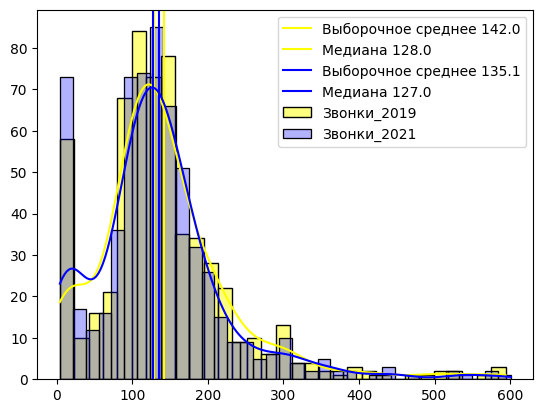

In [77]:
# графики и точеные оценки
st_plot(df_2019_2021, 'Звонки_2019', 'Звонки_2021')

In [78]:
test_normal_distribution(df_2019_2021, 'Звонки_2019', 'Звонки_2021')

Проверка на нормальное распределение признака <<Звонки_2019>> по критерию Шапиро 

Гипотезу H_0 о нормальном законе распределения признака <<Звонки_2019>> отвергаем, 
т.е. признак <<Звонки_2019>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Звонки_2021>> по критерию Шапиро 

Гипотезу H_0 о нормальном законе распределения признака <<Звонки_2021>> отвергаем, 
т.е. признак <<Звонки_2021>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Звонки_2019>> по критерию Колмогорова-Смирнова 

Гипотезу H_0 о нормальном законе распределения признака <<Звонки_2019>> отвергаем, 
т.е. признак <<Звонки_2019>> имеет распределение, отличное от нормального.  
            
Проверка на нормальное распределение признака <<Звонки_2021>> по критерию Колмогорова-Смирнова 

Гипотезу H_0 о нормальном законе распределения признака <<Звонки_2021>> отвергаем, 
т.е. признак <<Звонки_2021>> имеет

Проверим гипотезы о параметрах

Так как законы распределения отличны от нормального, то для проверки гипотезы воспользуемся критерием Манна-Уитни.

Формулировка гипотез:

H0  : отсутствует статически значимая разница между количество звонков за 2019 г. и количеством звонков за 2021 г.

H1  : количество звонков 2019 г. БОЛЬШЕ количества звонков за 2021 г.

Обращаем внимание, что гипотеза  H1  сформулирована так потому, что выборочное среднее за 2019 г. БОЛЬШЕ выборочного среднего за 2021 г.

In [79]:
mannwhitneyu(df_2019_2021['Звонки_2019'], 
             df_2019_2021['Звонки_2021'],
             nan_policy = 'omit',  #пропуски опускаем
             alternative = 'greater')

MannwhitneyuResult(statistic=196386.5, pvalue=0.14353479692150528)

Итог: Так как  pvalue=0.14353479692150528>0.05=α , то гипотезу  H0  следует принять. Иными словами, нет статистически значимой разницы в количестве звонков за 2019 г. и 2021 г.

2 способ

In [84]:
#формируем датасет
series_2019 = pd.Series(
    data = df[df['year'] == 2019]['Общее количество звонков'],
    name = 'Звонки_2019')

series_2021 = pd.Series(
    data = df[df['year'] == 2021]['Общее количество звонков'],
    name = 'Звонки_2021')

#формируем единый датасет, чтобы воспользоваться функциями  
df_2019_2021 = (
    pd.concat([series_2019.reset_index(),
               series_2021.reset_index()],
              axis = 1).drop(columns=['index'])
          )

In [85]:
df

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Социальная категория,year,Суммарно звонков,Общее количество звонков
1,51,287.51,1.70,111.00,109.00,1,44,0,6,1,2021-10-21 15:39:54,рабочий,2021,110.00,221.00
2,41,113.70,2.10,41.00,27.00,0,0,0,1,36,2015-03-26 11:26:15,рабочий,2015,27.00,68.00
3,35,410.23,5.60,47.00,49.00,0,0,0,11,23,2016-01-04 15:53:20,рабочий,2016,49.00,96.00
4,26,537.60,4.80,58.00,77.00,4,0,0,16,29,2017-05-03 13:33:53,аспирант,2017,81.00,139.00
5,26,324.56,3.30,45.00,75.00,3,1,1,8,15,2016-11-13 15:53:16,аспирант,2016,78.00,123.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.70,36.00,28.00,2,6,0,12,30,2021-04-10 14:58:23,рабочий,2021,30.00,66.00
4488,40,500.68,6.00,46.00,66.00,0,6,0,15,23,2021-09-22 14:52:43,рабочий,2021,66.00,112.00
4489,60,470.42,3.50,58.00,129.00,2,4,0,19,5,2019-04-04 17:33:38,пенсионер,2019,131.00,189.00
4490,38,858.99,9.30,50.00,74.00,0,0,0,28,69,2015-12-30 16:28:26,рабочий,2015,74.00,124.00


клиенты больше звонили   одинаково 2019 по сравнению с 2021 годом по количеству звонков

Студенты больше совершили звонков в 2019 году по сравнению с 2021 годом.

Гипотеза: студенты больше совершили звонков в 2019 году по сравнению с 2021 годом

Формируем "студенческие" выборки по годам;
Получим точечные оцекни выборочных средних двух выборок;
Построим графики плотностей;
Проверим гипотезы о нормальности распределений;
Проверим гипотезы о равенстве параметров распределений.

In [114]:
series_student_2019 = pd.Series(
    data = df[(df['Социальная категория'] == 'студент') & (df['year'] == 2019)]['Общее количество звонков'],
    name = 'Звонки_студентов_2019')

series_student_2021 = pd.Series(
    data = df[(df['Социальная категория'] == 'студент') & (df['year'] == 2021)]['Общее количество звонков'],
    name = 'Звонки_студентов_2021')

#формируем единый датасет, чтобы воспользоваться функциями  
df_student_2019_2021 = (
    pd.concat([series_student_2019.reset_index(),
           series_student_2021.reset_index()], 
          axis = 1).drop(columns=['index'])
          )

In [115]:
df_student_2019_2021.head(2)

,Звонки_студентов_2019,Звонки_студентов_2021
0,309.00,134.00
1,43.00,117.00


In [117]:
#общее количество звонков студентов в 2019 и 2021
df.loc[(df['year'].isin([2019, 2021]) & (df['Социальная категория'] == 'студент'))].groupby('year')['Общее количество звонков'].sum()

year
2019   8,394.00
2021   6,852.00
Name: Общее количество звонков, dtype: float64

In [118]:
df[df['Социальная категория']=='студент']['Общее количество звонков'].dropna(),'norm'
df[df['Социальная категория']=='студент']['Общее количество звонков'].dropna().mean(),df.loc[(df['year'].isin([2019])&(['Социальная категория']=='студент'))]['Общее количество звонков']


(116.43248532289628,
 Series([], Name: Общее количество звонков, dtype: float64))

In [120]:
#проверка на нормальность с помощью критерия Шапиро
shapiro(df.loc[(df['year'].isin([2019])& (df['Социальная категория'] == 'студент'))]['Общее количество звонков'].dropna())

ShapiroResult(statistic=0.8067211508750916, pvalue=5.047246887102119e-08)

In [122]:
#отдельно по каждому году проверить шапиро
shapiro(df.loc[(df['year'].isin([2021])& (df['Социальная категория'] == 'студент'))]['Общее количество звонков'].dropna())

ShapiroResult(statistic=0.9302850961685181, pvalue=0.0016740118153393269)

In [123]:
df[df['Социальная категория']=='студент']['Общее количество звонков'].dropna(),'norm'
df[df['Социальная категория']=='студент']['Общее количество звонков'].dropna().mean(),df.loc[(df['year'].isin([2021])&(['Социальная категория']=='студент'))]['Общее количество звонков']


(116.43248532289628,
 Series([], Name: Общее количество звонков, dtype: float64))

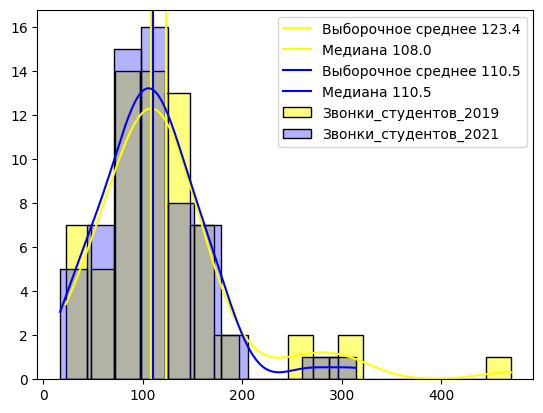

In [124]:
# графики и точеные оценки
st_plot(df_student_2019_2021, 'Звонки_студентов_2019', 'Звонки_студентов_2021')

In [ ]:
test_normal_distribution(df_student_2019_2021, 'Звонки_студентов_2019', 'Звонки_студентов_2021')

Видим, что в тесты говорят разное. Значит можно считать, что не все распределения подчиняются нормальному закону. Думаю, что если аномалии убрать, то будет нормальным.

Проверим гипотезы о параметрах (выборочных средних)

Так как законы распределения отличны от нормального, то для проверки гипотезы воспользуемся критерием Манна-Уитни.

Формулировка гипотез:

H0  : отсутствует статически значимая разница между количество звонков студентов за 2019 г. и количеством звонков за 2021 г.

H1  : количество звонков студентов за 2019 г. БОЛЬШЕ количества звонков студентов за 2021 г.

Обращаем внимание, что гипотеза  H1  сформулирована так потому, что выборочное среднее за 2019 г. БОЛЬШЕ выборочного среднего за 2021 г.

Если нужно проверить и медианы, то следует воспользоваться вот этим тестом https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

In [125]:
df_student_2019_2021['Звонки_студентов_2019'],
df_student_2019_2021['Звонки_студентов_2021'] 

0    134.00
1    117.00
2    141.00
3     86.00
4    114.00
      ...  
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
Name: Звонки_студентов_2021, Length: 68, dtype: float64

In [ ]:
mannwhitneyu(df_student_2019_2021['Звонки_студентов_2019'],
             df_student_2019_2021['Звонки_студентов_2021'],
             nan_policy = 'omit',  #пропуски опускаем
             alternative = 'greater')

Итог: Так как  pvalue=0.24953462343821364>0.05=α , то гипотезу  H0  следует принять. Иными словами, нет статистически значимой разницы в количестве звонков, совершаемых студентами, в 2019 г. и 2021 г.